Day 5 will be devoted to recreating Minard's graph of Napolean's retreat. Datasets are in CSV files in this directory. You don't have to use python for this, but it would be the most educational. It's easy to copy the many tutorials that use R. Though if using python is overwhelming, following along with an R tutorial might be useful.  

There are several examples of this online. You can find some of them here: [datavis.ca/gallery/re-minard.php](http://www.datavis.ca/gallery/re-minard.php). I'd encourage you to try as much of this on your own as you're able. Copying others' code can be useful to a point, but much of what you learn won't be retained and so will be of limited value. 

You can approach this in a couple of ways (and probably more). You might try to make a faithful recreation of Minard's original. You might update his graph to appeal to contemporary visual conventions. Or you might take a completely different approach and show a different view of the data entirely. Each of you comes to the class with a different set of experiences and expertise, so try to tailor an approach that suits your needs.

In [6]:
import os
import pandas as pd

troops = pd.read_csv(os.path.join('example_graph', 'minard_troops.csv'))
cities = pd.read_csv(os.path.join('example_graph', 'minard_cities.csv'))
temps = pd.read_csv(os.path.join('example_graph', 'minard_temps.csv'),
                    parse_dates=['date'])

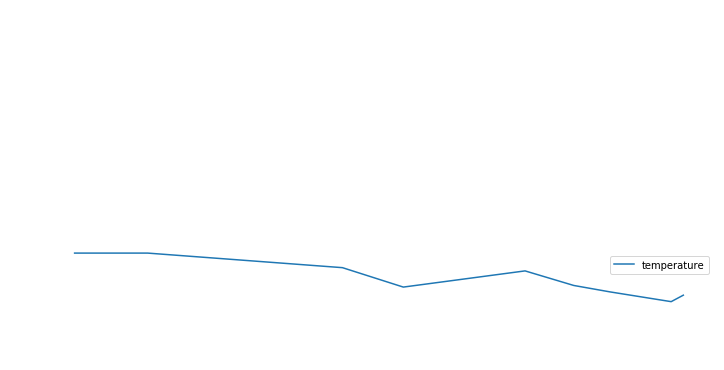

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt


# Using keyword arguments to control aspect ratios and figure
# options while constructing subplots
fig_dict = {'figsize': (12, 6), 'facecolor': 'white'}
grid_dict = {'height_ratios': [4, 1], 
             'width_ratios': [1]}

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False,
                        gridspec_kw=grid_dict, **fig_dict)
for ax in axs:
    ax.set_axis_off()
    fig.add_axes(ax)
    plt.setp(ax.spines.values(), color='black')
# plotting form `pandas` onto subplots created in `matplotlib`
# using the `ax=` keyword argument.
temps.plot('date', 'temperature', ax=axs[1])
plt.show()

In [36]:
import numpy as np
from matplotlib.collections import LineCollection


def line_coll():
    xs = np.arange(10)
    ys = np.random.randint(0, 10+1, 10) / 10 + 1
    zs = np.random.sample(10)
    zs = zs.cumsum() + 1
    zs = zs ** 2
    
    points = np.array([xs, ys]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, linewidths=zs, color='blue')
    fig, a = plt.subplots()
    a.add_collection(lc)
    a.set_xlim([-1, 11])
    a.set_ylim([-1, 11])
    fig.show()

Non Gui backends are: ['agg', 'cairo', 'gdk', 'pdf', 'pgf', 'ps', 'svg', 'template']
Gui backends I will test for ['GTK', 'GTKAgg', 'GTKCairo', 'GTK3Agg', 'GTK3Cairo', 'MacOSX', 'nbAgg', 'Qt4Agg', 'Qt4Cairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo']
testing GTK
     GTK Is Available


/Users/nathanmatteson/.virtualenvs/datavis_bootcamp/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Using .....  GTK
testing GTKAgg
     GTKAgg Is Available
Using .....  GTKAgg
testing GTKCairo
     GTKCairo Is Available
Using .....  GTKCairo
testing GTK3Agg
     GTK3Agg Is Available
Using .....  GTK3Agg
testing GTK3Cairo
     GTK3Cairo Is Available
Using .....  GTK3Cairo
testing MacOSX
     MacOSX Is Available
Using .....  MacOSX
testing nbAgg
     nbAgg Is Available
Using .....  nbAgg
testing Qt4Agg
     Qt4Agg Is Available
Using .....  Qt4Agg
testing Qt4Cairo
     Qt4Cairo Is Available


Using .....  Qt4Cairo
testing Qt5Agg
     Qt5Agg Is Available
Using .....  Qt5Agg
testing Qt5Cairo
     Qt5Cairo Is Available
Using .....  Qt5Cairo
testing TkAgg
     TkAgg Is Available
Using .....  TkAgg
testing TkCairo
     TkCairo Is Available
Using .....  TkCairo
testing WebAgg
     WebAgg Is Available
Using .....  WebAgg
testing WX
     WX Is Available
Using .....  WX
testing WXAgg
     WXAgg Is Available
Using ..... 

 WXAgg
testing WXCairo
     WXCairo Is Available
Using .....  WXCairo


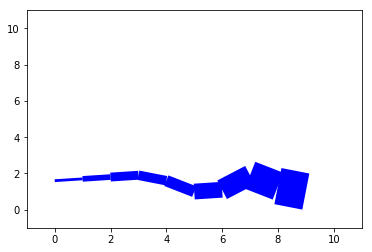

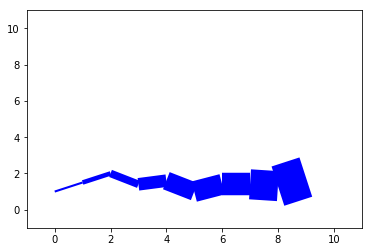

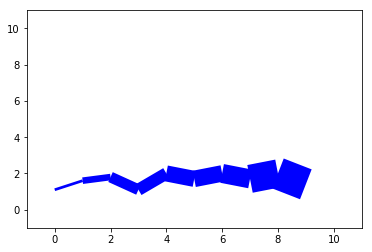

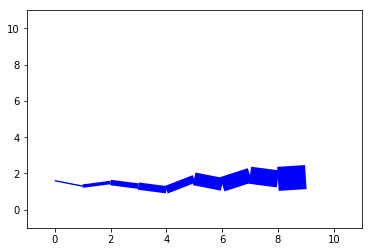

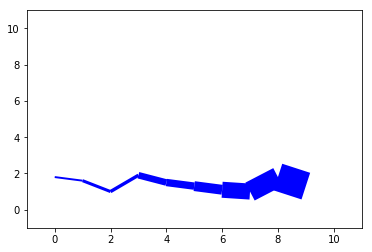

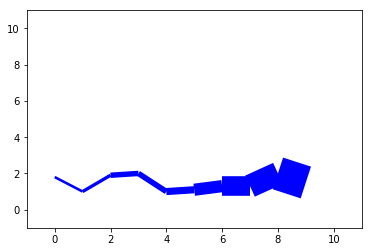

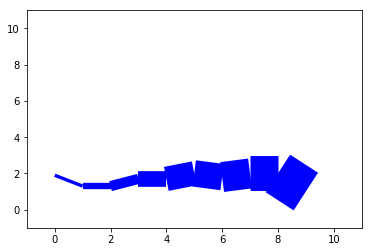

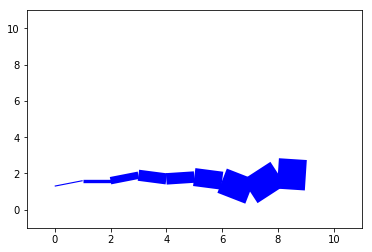

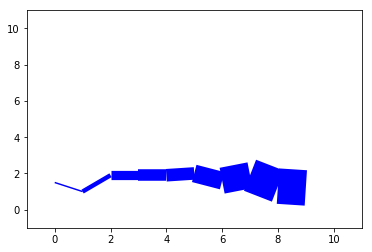

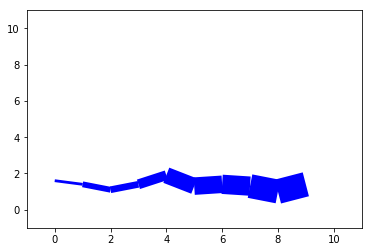

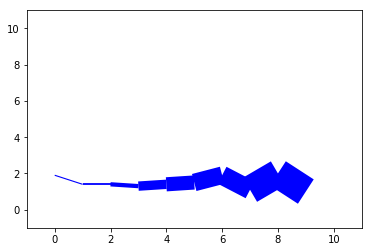

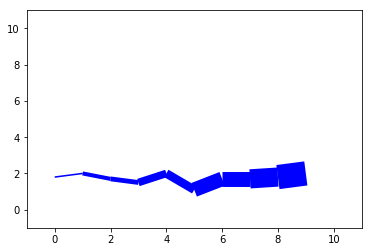

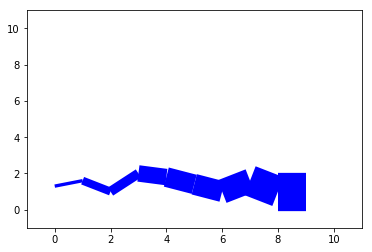

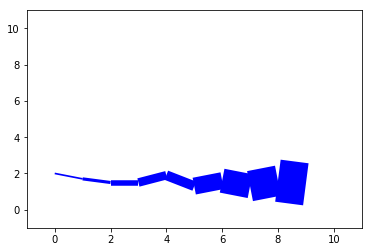

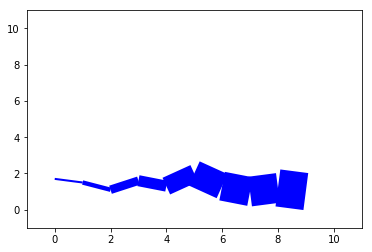

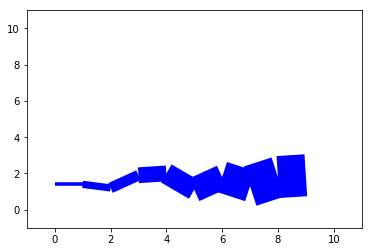

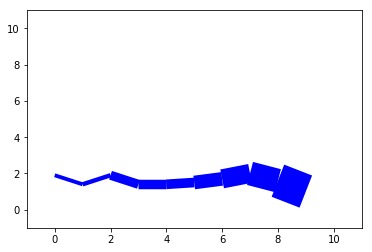

In [37]:
# Script for testing matplotlib's available backends.
# Modified from https://stackoverflow.com/questions/3285193/how-to-switch-backends-in-matplotlib-python


def test_backends(f):
    import matplotlib
    
    gui_env = [i for i in matplotlib.rcsetup.interactive_bk]
    non_gui_backends = matplotlib.rcsetup.non_interactive_bk
    print("Non Gui backends are:", non_gui_backends)
    print("Gui backends I will test for", gui_env)
    for gui in gui_env:
        print("testing", gui)
        try:
            matplotlib.use(gui, warn=False, force=True)
            from matplotlib import pyplot as plt
            print("    ", gui, "Is Available")
            f()
            print("Using ..... ", matplotlib.get_backend())
        except:
            print("    ", gui, "Not found")
            

test_backends(line_coll)